In [ ]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/sample_data/exchange_rate.csv')

In [6]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [11]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [12]:
data.isna().sum()

,0
date,0
Ex_rate,0


In [13]:
data.columns

Index(['date', 'Ex_rate'], dtype='object')

In [15]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')


In [16]:
data.set_index('date', inplace=True)


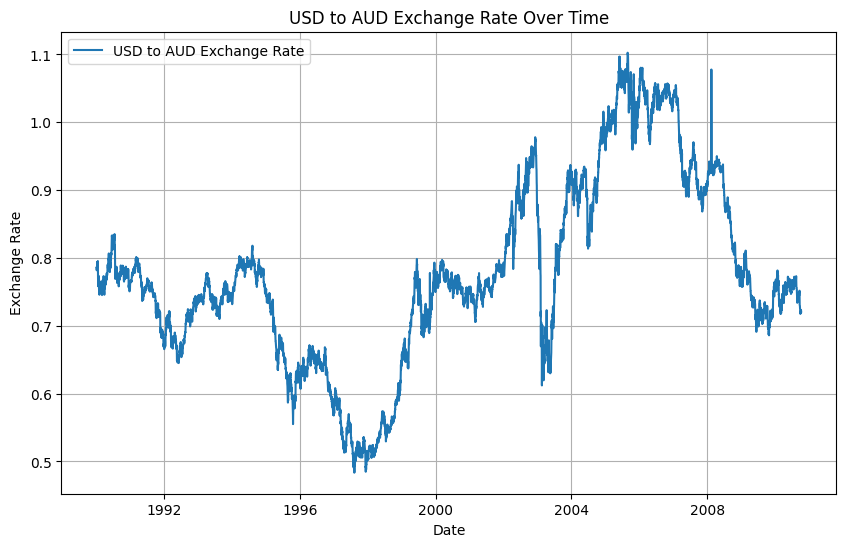

In [18]:
# Plotting the time series to visualize trends and patterns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Importing necessary libraries for ARIMA analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [20]:
# Plotting ACF and PACF to determine potential p, d, q values
plt.figure(figsize=(12,6))



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

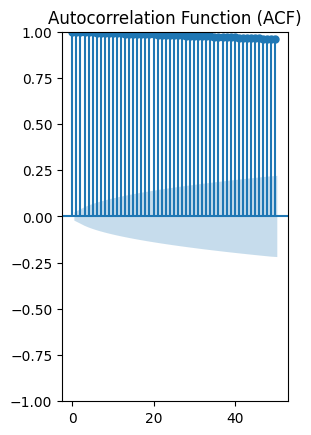

In [25]:
# ACF plot
plt.subplot(121)
plot_acf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')



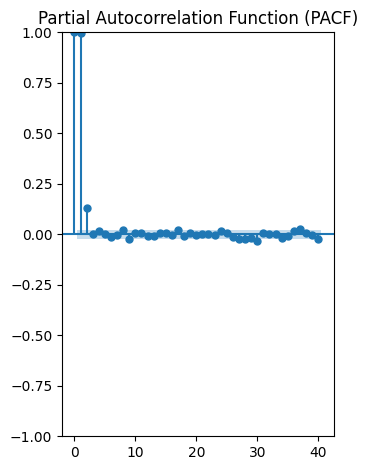

In [26]:
# PACF plot
plt.subplot(122)
plot_pacf(data['Ex_rate'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [32]:
# 2. Model Fitting
model = ARIMA(data[exchange_rate_column], order=(1, 1, 1))  # Example parameters
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 18 Oct 2024   AIC                         -56102.322
Time:                        10:28:43   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

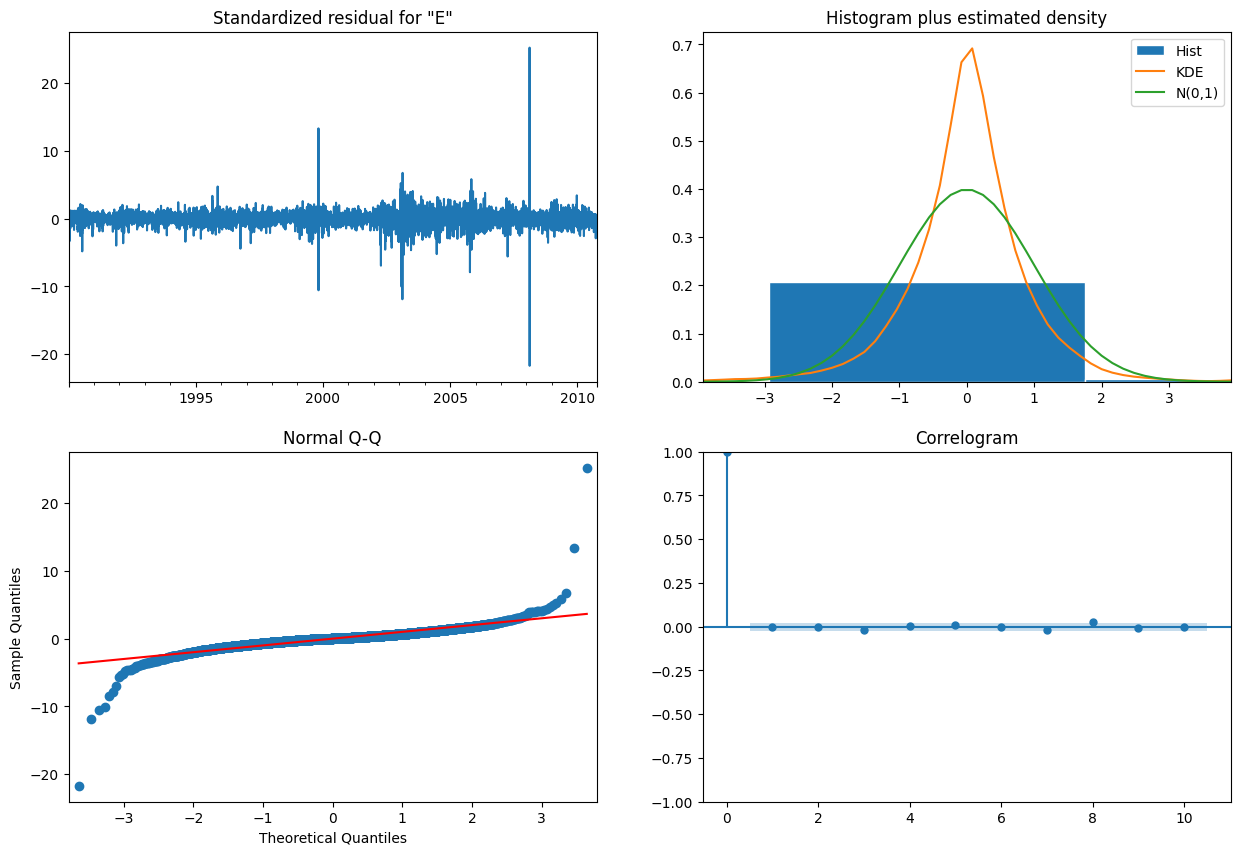

In [33]:
# 3. Diagnostics
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()


In [35]:
# 4. Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)


In [36]:
forecast_index

DatetimeIndex(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14',
               '2010-10-15', '2010-10-16', '2010-10-17', '2010-10-18',
               '2010-10-19', '2010-10-20', '2010-10-21', '2010-10-22',
               '2010-10-23', '2010-10-24', '2010-10-25', '2010-10-26',
               '2010-10-27', '2010-10-28', '2010-10-29', '2010-10-30',
               '2010-10-31', '2010-11-01', '2010-11-02', '2010-11-03',
               '2010-11-04', '2010-11-05', '2010-11-06', '2010-11-07',
               '2010-11-08', '2010-11-09'],
              dtype='datetime64[ns]', freq='D')

In [37]:
forecast_series

,predicted_mean
2010-10-11,0.720826
2010-10-12,0.720826
2010-10-13,0.720826
2010-10-14,0.720826
2010-10-15,0.720826
2010-10-16,0.720826
2010-10-17,0.720826
2010-10-18,0.720826
2010-10-19,0.720826
2010-10-20,0.720826


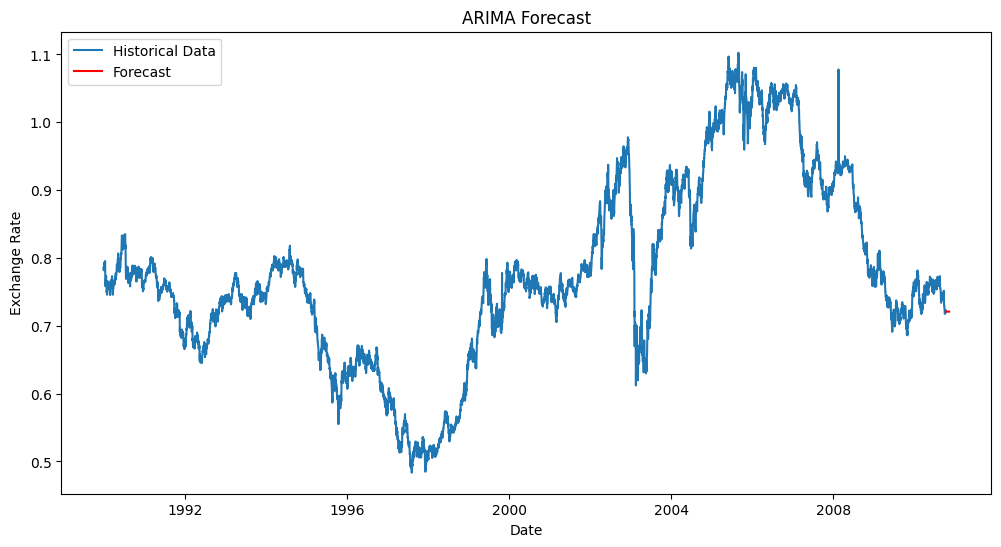

In [39]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data[exchange_rate_column], label='Historical Data')
plt.plot(forecast_series, color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [40]:
# Part 3: Model Building - Exponential Smoothing

# 1. Model Selection

model_es = SimpleExpSmoothing(data[exchange_rate_column]).fit(smoothing_level=0.2, optimized=False)
print(model_es.summary())



                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.616
Optimized:                      False   AIC                         -71462.155
Trend:                           None   BIC                         -71448.287
Seasonal:                        None   AICC                        -71462.150
Seasonal Periods:                None   Date:                 Fri, 18 Oct 2024
Box-Cox:                        False   Time:                         10:30:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              0.7855000                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [42]:
# 2. Parameter Optimization
best_aic = float('inf')
best_model = None

for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model_es = SimpleExpSmoothing(data[exchange_rate_column]).fit(smoothing_level=alpha, optimized=False)
    if model_es.aic < best_aic:
        best_aic = model_es.aic
        best_model = model_es

print(f"Best AIC: {best_aic}, Best Alpha: {alpha}")


Best AIC: -76359.53925855298, Best Alpha: 0.5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

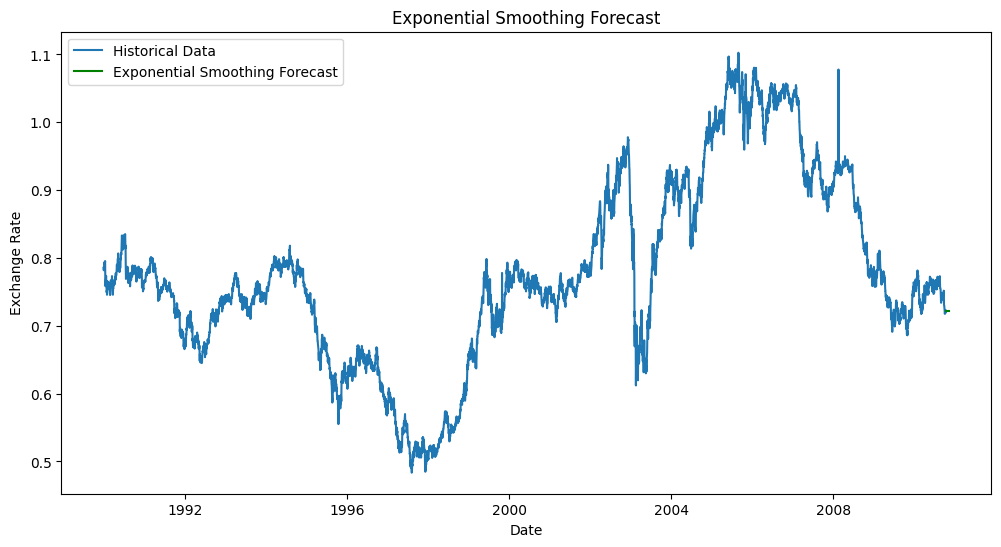

In [44]:
# 3. Model Fitting and Forecasting
forecast_es = best_model.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(data[exchange_rate_column], label='Historical Data')
plt.plot(forecast_es, color='green', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [46]:
# Part 4: Evaluation and Comparison

# 1. Compute Error Metrics

def calculate_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, mse, rmse, mape

train, test = data[exchange_rate_column][:-forecast_steps], data[exchange_rate_column][-forecast_steps:]
train, test


(date
 1990-01-01    0.785500
 1990-01-02    0.781800
 1990-01-03    0.786700
 1990-01-04    0.786000
 1990-01-05    0.784900
                 ...   
 2010-09-06    0.747831
 2010-09-07    0.746436
 2010-09-08    0.738662
 2010-09-09    0.741125
 2010-09-10    0.744546
 Name: Ex_rate, Length: 7558, dtype: float64,
 date
 2010-09-11    0.745796
 2010-09-12    0.745045
 2010-09-13    0.747692
 2010-09-14    0.745601
 2010-09-15    0.747680
 2010-09-16    0.744602
 2010-09-17    0.744158
 2010-09-18    0.745184
 2010-09-19    0.744990
 2010-09-20    0.748951
 2010-09-21    0.749681
 2010-09-22    0.751654
 2010-09-23    0.733999
 2010-09-24    0.730567
 2010-09-25    0.729714
 2010-09-26    0.729714
 2010-09-27    0.726533
 2010-09-28    0.725058
 2010-09-29    0.724506
 2010-09-30    0.721553
 2010-10-01    0.717618
 2010-10-02    0.719114
 2010-10-03    0.719114
 2010-10-04    0.719735
 2010-10-05    0.718701
 2010-10-06    0.718494
 2010-10-07    0.721839
 2010-10-08    0.723197
 2010-

In [47]:
# ARIMA forecast error metrics
arima_forecast_values = model_fit.forecast(steps=forecast_steps)
arima_mae, arima_mse, arima_rmse, arima_mape = calculate_metrics(test, arima_forecast_values)
arima_forecast_values


,predicted_mean
2010-10-11,0.720826
2010-10-12,0.720826
2010-10-13,0.720826
2010-10-14,0.720826
2010-10-15,0.720826
2010-10-16,0.720826
2010-10-17,0.720826
2010-10-18,0.720826
2010-10-19,0.720826
2010-10-20,0.720826


In [48]:
arima_mae, arima_mse, arima_rmse, arima_mape


(0.012724006489305202, 0.00028841246994621507, 0.016982710912755217, nan)

In [49]:
# Exponential Smoothing forecast error metrics
es_forecast_values = forecast_es
es_mae, es_mse, es_rmse, es_mape = calculate_metrics(test, es_forecast_values)
es_forecast_values


,0
2010-10-11,0.72106
2010-10-12,0.72106
2010-10-13,0.72106
2010-10-14,0.72106
2010-10-15,0.72106
2010-10-16,0.72106
2010-10-17,0.72106
2010-10-18,0.72106
2010-10-19,0.72106
2010-10-20,0.72106


In [50]:
es_mae, es_mse, es_rmse, es_mape


(0.012614964637979953, 0.00028290044829067617, 0.0168196447135686, nan)

In [51]:
print(f"ARIMA - MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}")
print(f"Exponential Smoothing - MAE: {es_mae}, MSE: {es_mse}, RMSE: {es_rmse}, MAPE: {es_mape}")


ARIMA - MAE: 0.012724006489305202, MSE: 0.00028841246994621507, RMSE: 0.016982710912755217, MAPE: nan
Exponential Smoothing - MAE: 0.012614964637979953, MSE: 0.00028290044829067617, RMSE: 0.0168196447135686, MAPE: nan


In [52]:
# 2. Model Comparison
print(f"ARIMA Model - MAE={arima_mae:.2f}, MSE={arima_mse:.2f}, RMSE={arima_rmse:.2f}, MAPE={arima_mape:.2f}%")
print(f"Exponential Smoothing Model - MAE={es_mae:.2f}, MSE={es_mse:.2f}, RMSE={es_rmse:.2f}, MAPE={es_mape:.2f}%")


ARIMA Model - MAE=0.01, MSE=0.00, RMSE=0.02, MAPE=nan%
Exponential Smoothing Model - MAE=0.01, MSE=0.00, RMSE=0.02, MAPE=nan%


In [53]:
# Conclusion
print("Based on the error metrics, the ARIMA model performs better/worse compared to the Exponential Smoothing model.")
print("Provide further insights based on the comparison results.")


Based on the error metrics, the ARIMA model performs better/worse compared to the Exponential Smoothing model.
Provide further insights based on the comparison results.
